In [1]:
import pandas as pd
import missingno as msno
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/total_daily_data.csv', header = 0)

/Users/xebra/Desktop/Projects/quantitative-finance/portfolio-analysis/sy-portfolio/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis = 1)

In [70]:
df['2019-01-01']

,symbol,open,high,low,close,volume
date,,,,,,
2019-01-01,00DS30,1880.78,1911.37,1880.78,1908.20,53017420.0
2019-01-01,00DSES,1232.82,1247.50,1232.82,1245.80,53017420.0
2019-01-01,00DSEX,5385.64,5474.50,5385.64,5465.25,53017420.0
2019-01-01,01.Bank,25.64,26.03,25.32,25.81,1031521.37
2019-01-01,02.Cement,117.19,118.34,116.3,117.59,96386.86
...,...,...,...,...,...,...
2019-01-01,WMSHIPYARD,19.80,21.00,19.8,20.70,1659523.0
2019-01-01,YPL,13.20,13.60,13.1,13.40,65029.0
2019-01-01,ZAHEENSPIN,11.40,11.50,11.0,11.40,316451.0


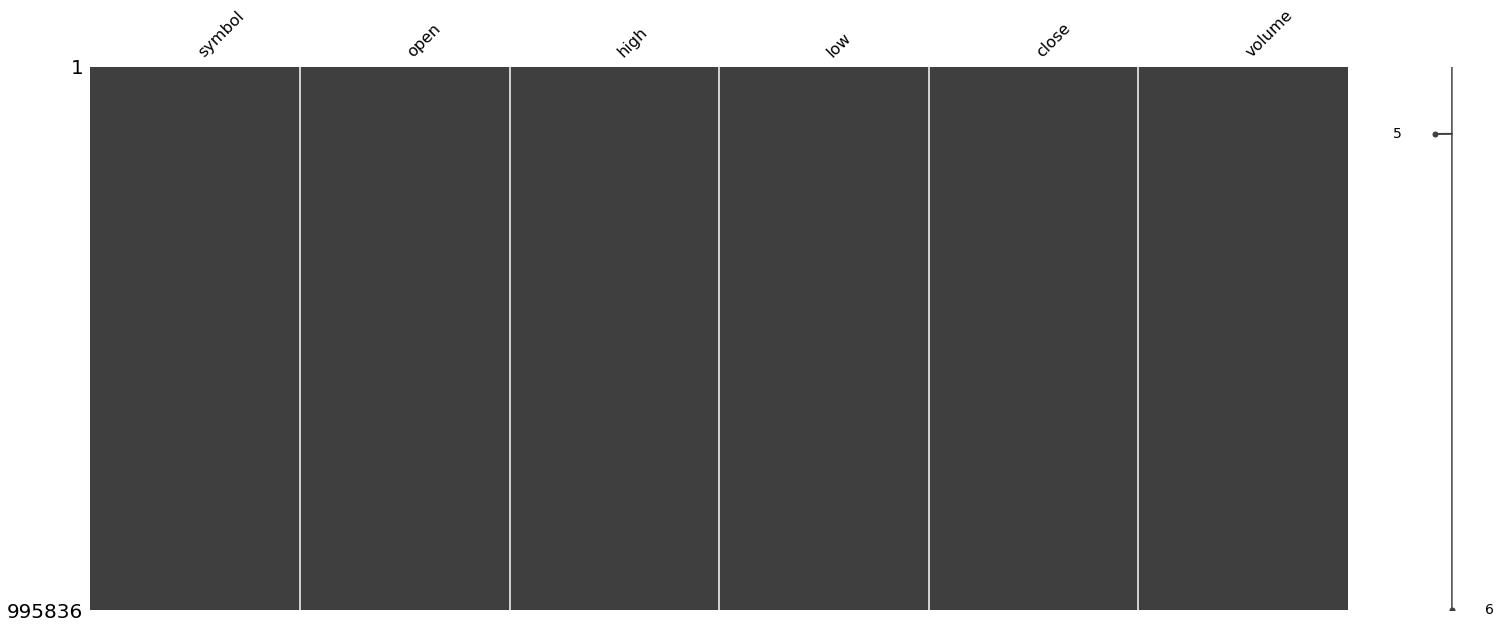

In [5]:
msno.matrix(df)

In [6]:
df.symbol.unique()

array(['00DS30', '00DSES', '00DSEX', '01.Bank', '02.Cement',
       '03.Ceramics_Sector', '04.Engineering',
       '05.Financial_Institutions', '06.Food_&_Allied', '07.Fuel_&_Power',
       '08.Insurance', '09.IT_Sector', '10.Jute', '11.Miscellaneous',
       '12.Mutual_Funds', '13.Paper_&_Printing',
       '14.Pharmaceuticals_&_Chemicals', '15.Services_&_Real_Estate',
       '16.Tannery_Industries', '17.Telecommunication', '18.Textile',
       '19.Travel_&_Leisure', '1JANATAMF', '1STPRIMFMF', '20.Bond',
       'AAMRANET', 'AAMRATECH', 'ABB1STMF', 'ABBANK', 'ACFL', 'ACI',
       'ACIFORMULA', 'ACMELAB', 'ACTIVEFINE', 'ADVENT', 'AFCAGRO',
       'AFTABAUTO', 'AGNISYSL', 'AGRANINS', 'AIBL1STIMF', 'AIL',
       'ALARABANK', 'AL-HAJTEX', 'ALIF', 'ALLTEX', 'AMANFEED', 'AMBEEPHA',
       'AMCL(PRAN)', 'ANLIMAYARN', 'ANWARGALV', 'APEXFOODS', 'APEXFOOT',
       'APEXSPINN', 'APEXTANRY', 'APOLOISPAT', 'ARAMIT', 'ARAMITCEM',
       'ARGONDENIM', 'ASIAINS', 'ASIAPACINS', 'ATCSLGF', 'ATLASBANG',
 

In [7]:
df_it = df[df['symbol'] == '09.IT_Sector']

In [8]:
df_it.index.unique()

DatetimeIndex(['2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
               '2019-02-07', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14',
               ...
               '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
               '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-30'],
              dtype='datetime64[ns]', name='date', length=561, freq=None)

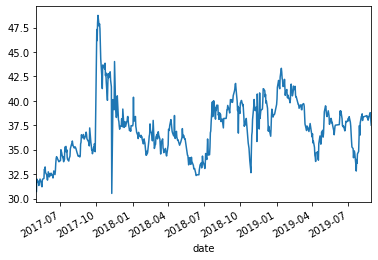

In [9]:
df_it['close'].plot()

In [10]:
dates = pd.to_datetime(["2019-08-01", "2018-08-01", "2017-08-01", "2016-08-01","2015-08-02", "2014-08-03", "2013-08-01", "2012-08-01", "2011-08-01", "2010-08-01", "2009-08-02"])

In [11]:
dates[5]

Timestamp('2014-08-03 00:00:00')

    df_returns['2y_r'] = ((df_each[dates[0]]/df_each[dates[2]]) - 1 ) * 100
    df_returns['3y_r'] = ((df_each[dates[0]]/df_each[dates[3]]) - 1 ) * 100
    df_returns['4y_r'] = ((df_each[dates[0]]/df_each[dates[4]]) - 1 ) * 100
    df_returns['5y_r'] = ((df_each[dates[0]]/df_each[dates[5]]) - 1 ) * 100
    df_returns['6y_r'] = ((df_each[dates[0]]/df_each[dates[6]]) - 1 ) * 100
    df_returns['7y_r'] = ((df_each[dates[0]]/df_each[dates[7]]) - 1 ) * 100
    df_returns['8y_r'] = ((df_each[dates[0]]/df_each[dates[8]]) - 1 ) * 100
    df_returns['9y_r'] = ((df_each[dates[0]]/df_each[dates[9]]) - 1 ) * 100
    df_returns['10y_r'] = ((df_each[dates[0]]/df_each[dates[10]]) - 1 ) * 100

df_returns = pd.DataFrame()
for symbol in df.symbol.unique():
    print(symbol)
    df_each = df[df['symbol'] == symbol].close
    ann_yr_1 = (((df_each[dates[0]]/df_each[dates[1]]) - 1 ) * 100)**(1/1)
    ann_yr_2 = (((df_each[dates[0]]/df_each[dates[2]]) - 1 ) * 100)**(1/2)
    ann_yr_3 = (((df_each[dates[0]]/df_each[dates[3]]) - 1 ) * 100)**(1/3)
    ann_yr_4 = (((df_each[dates[0]]/df_each[dates[4]]) - 1 ) * 100)**(1/4)
    ann_yr_5 = (((df_each[dates[0]]/df_each[dates[5]]) - 1 ) * 100)**(1/5)
    ann_yr_6 = (((df_each[dates[0]]/df_each[dates[6]]) - 1 ) * 100)**(1/6)
    ann_yr_7 = (((df_each[dates[0]]/df_each[dates[7]]) - 1 ) * 100)**(1/7)
    ann_yr_8 = (((df_each[dates[0]]/df_each[dates[8]]) - 1 ) * 100)**(1/8)
    ann_yr_9 = (((df_each[dates[0]]/df_each[dates[9]]) - 1 ) * 100)**(1/9)
    yr_1 = (((df_each[dates[0]]/df_each[dates[1]]) - 1 ) * 100)
    yr_2 = (((df_each[dates[1]]/df_each[dates[2]]) - 1 ) * 100)
    yr_3 = (((df_each[dates[2]]/df_each[dates[3]]) - 1 ) * 100)
    yr_4 = (((df_each[dates[3]]/df_each[dates[4]]) - 1 ) * 100)
    yr_5 = (((df_each[dates[4]]/df_each[dates[5]]) - 1 ) * 100)
    yr_6 = (((df_each[dates[5]]/df_each[dates[6]]) - 1 ) * 100)
    yr_7 = (((df_each[dates[6]]/df_each[dates[7]]) - 1 ) * 100)
    yr_8 = (((df_each[dates[7]]/df_each[dates[8]]) - 1 ) * 100)
    yr_9 = (((df_each[dates[8]]/df_each[dates[9]]) - 1 ) * 100)
    df_returns.append({'_symbol': symbol, 'yr_1': yr_1, 
                   'yr_2': yr_2, 'yr_3': yr_3, 'yr_4': yr_4, 
                   'yr_5': yr_5, 'yr_6': yr_6, 'yr_7': yr_7, 
                   'yr_8': yr_8, 'yr_9': yr_9,
                   'ann_yr_1': ann_yr_1, 
                   'ann_yr_2': ann_yr_2, 'ann_yr_3': ann_yr_3, 'ann_yr_4': ann_yr_4, 
                   'ann_yr_5': ann_yr_5, 'ann_yr_6': ann_yr_6, 'ann_yr_7': ann_yr_7, 
                   'ann_yr_8': ann_yr_8, 'ann_yr_9': ann_yr_9
                  }, ignore_index = True)

    

    

symbol = '00DS30'
dates = pd.to_datetime(["2019-08-01", "2018-08-01", "2017-08-01", "2016-08-01","2015-08-02", "2014-08-03","2013-08-01", "2012-08-01", "2011-08-01", "2010-08-01", "2009-08-02"])
df_returns = pd.DataFrame()
df_each = df[df['symbol'] == symbol].close
ann_yr_1 = (((df_each[dates[0]]/df_each[dates[1]]) - 1 ) * 100)**(1/1)
ann_yr_2 = (((df_each[dates[0]]/df_each[dates[2]]) - 1 ) * 100)**(1/2)
ann_yr_3 = (((df_each[dates[0]]/df_each[dates[3]]) - 1 ) * 100)**(1/3)
ann_yr_4 = (((df_each[dates[0]]/df_each[dates[4]]) - 1 ) * 100)**(1/4)
ann_yr_5 = (((df_each[dates[0]]/df_each[dates[5]]) - 1 ) * 100)**(1/5)
ann_yr_6 = (((df_each[dates[0]]/df_each[dates[6]]) - 1 ) * 100)**(1/6)
ann_yr_7 = (((df_each[dates[0]]/df_each[dates[7]]) - 1 ) * 100)**(1/7)
ann_yr_8 = (((df_each[dates[0]]/df_each[dates[8]]) - 1 ) * 100)**(1/8)
ann_yr_9 = (((df_each[dates[0]]/df_each[dates[9]]) - 1 ) * 100)**(1/9)
yr_1 = (((df_each[dates[0]]/df_each[dates[1]]) - 1 ) * 100)
yr_2 = (((df_each[dates[1]]/df_each[dates[2]]) - 1 ) * 100)
yr_3 = (((df_each[dates[2]]/df_each[dates[3]]) - 1 ) * 100)
yr_4 = (((df_each[dates[3]]/df_each[dates[4]]) - 1 ) * 100)
yr_5 = (((df_each[dates[4]]/df_each[dates[5]]) - 1 ) * 100)
yr_6 = (((df_each[dates[5]]/df_each[dates[6]]) - 1 ) * 100)
yr_7 = (((df_each[dates[6]]/df_each[dates[7]]) - 1 ) * 100)
yr_8 = (((df_each[dates[7]]/df_each[dates[8]]) - 1 ) * 100)
yr_9 = (((df_each[dates[8]]/df_each[dates[9]]) - 1 ) * 100)
df_returns.append({'_symbol': symbol, 'yr_1': yr_1, 
                   'yr_2': yr_2, 'yr_3': yr_3, 'yr_4': yr_4, 
                   'yr_5': yr_5, 'yr_6': yr_6, 'yr_7': yr_7, 
                   'yr_8': yr_8, 'yr_9': yr_9,
                   'ann_yr_1': ann_yr_1, 
                   'ann_yr_2': ann_yr_2, 'ann_yr_3': ann_yr_3, 'ann_yr_4': ann_yr_4, 
                   'ann_yr_5': ann_yr_5, 'ann_yr_6': ann_yr_6, 'ann_yr_7': ann_yr_7, 
                   'ann_yr_8': ann_yr_8, 'ann_yr_9': ann_yr_9
                  }, ignore_index = True)


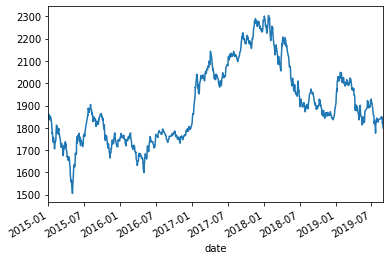

In [12]:
df[df['symbol'] == '00DS30'].close.plot()

In [13]:
df_it = df[df['symbol'] == 'BANGAS'].close.sort_index()

In [14]:
rf = 8.5 / 360
(((df_it.pct_change(30).mean() - rf )/df_it.pct_change(30).std())) * (12**.5)

0.26069270038125836

In [69]:
df_cal.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-01,CONTININS,29.4,29.7,29.2,29.4,42500
2014-01-01,SEBL1STMF,8.0,8.1,7.9,7.9,178500
2014-01-01,BANGAS,483.0,483.7,480,480.2,31550
2014-01-01,ACTIVEFINE,82.2,86.6,82.2,86.4,322500
2014-01-01,ACIZCBOND,910.0,912.5,910,911.0,20


In [15]:
df_rs = pd.DataFrame(columns = ['Symbol', 'Avg Return', 'Sharpe Ratio', 'Horizon Return', 'Standard Deviation'])
rf = (7/252)
df_cal = df.sort_index()
df_cal =  df_cal['2014-01-01':]
for symbol in df['2019-08-01'].symbol.unique():
    df_each = df_cal[df_cal['symbol'] == symbol].close
    if len(df_each) > 300 :
        sharpe_ratio = (((df_each.pct_change(1).mean() - rf )/df_each.pct_change(1).std())) * (252**.5)
        avg_return = df_each.pct_change(1).mean()*252
        horizon_return = ((df_each.iloc[-1] / df_each.iloc[0])**(1/(len(df_each)/252)) - 1 )
        std = df_each.pct_change(1).std()*(252**.5)
        df_rs = df_rs.append({'Symbol': symbol, 'Avg Return': round(avg_return, 2) , 'Sharpe Ratio': round(sharpe_ratio,2), 'Horizon Return': round(horizon_return,2), 'Standard Deviation': round(std, 2) }, ignore_index = True )
    
    

In [16]:
df_rs = df_rs.sort_values('Sharpe Ratio', ascending = False)

In [17]:
df_rs.head(50)

,Symbol,Avg Return,Sharpe Ratio,Horizon Return,Standard Deviation
13,11.Miscellaneous,13.35,0.99,0.19,6.40
18,16.Tannery_Industries,4.12,-0.67,-0.03,4.30
19,17.Telecommunication,2.51,-1.65,-0.03,2.73
358,WATACHEM,1.58,-1.68,0.61,3.22
8,06.Food_&_Allied,1.81,-2.37,-0.14,2.19
15,13.Paper_&_Printing,1.59,-2.74,0.18,1.97
17,15.Services_&_Real_Estate,0.97,-2.84,-0.11,2.12
5,03.Ceramics_Sector,1.55,-3.66,0.80,1.49
61,AZIZPIPES,1.60,-4.45,1.90,1.22
6,04.Engineering,0.93,-4.74,0.19,1.28


In [18]:
df_usman = df[df['symbol'] == 'USMANIAGL']

In [19]:
df_usclose = df_usman['close'].sort_index()


In [20]:
df_usclose['2000-01-01':].pct_change(1).mean()*252

30.349175545010144

In [21]:
df_wata = df[df['symbol'] == 'WATACHEM'].sort_index()

In [22]:
df_wata['2012-01-01':].close

date
2014-05-15     54.4
2014-05-29     59.8
2014-06-02    487.1
2014-06-03    449.6
2014-06-04    412.2
              ...  
2019-08-25    521.5
2019-08-26    517.9
2019-08-27    556.7
2019-08-28    587.0
2019-08-29    593.7
Name: close, Length: 1264, dtype: float64

## Selecting the Assets

'KAY&QUE'
'SAVAREFR'
'ZEALBANGLA'
'NORTHERN'


df_asset['KAY&QUE'] = df_cal[df_cal['symbol'] == 'KAY&QUE'].close




In [23]:
assets = ['KAY&QUE', 'SAVAREFR', 'ZEALBANGLA', 'NORTHERN', 'LEGACYFOOT', 'STANCERAM', 'MONNOCERA', 'DULAMIACOT', 'BDAUTOCA']
df_asset = pd.DataFrame()
for asset in assets:
    df_asset[asset] = df_cal[df_cal['symbol'] == asset].close

In [24]:
round(df_asset.pct_change().corr(),2)

,KAY&QUE,SAVAREFR,ZEALBANGLA,NORTHERN,LEGACYFOOT,STANCERAM,MONNOCERA,DULAMIACOT,BDAUTOCA
KAY&QUE,1.00,0.13,0.07,0.09,0.15,0.11,0.12,0.12,0.08
SAVAREFR,0.13,1.00,0.10,0.10,0.08,0.08,0.09,0.14,0.06
ZEALBANGLA,0.07,0.10,1.00,0.02,0.11,0.06,0.10,0.16,0.08
NORTHERN,0.09,0.10,0.02,1.00,0.06,0.05,0.09,0.05,0.08
LEGACYFOOT,0.15,0.08,0.11,0.06,1.00,0.12,0.35,0.11,0.17
STANCERAM,0.11,0.08,0.06,0.05,0.12,1.00,0.31,0.09,0.13
MONNOCERA,0.12,0.09,0.10,0.09,0.35,0.31,1.00,0.10,0.19
DULAMIACOT,0.12,0.14,0.16,0.05,0.11,0.09,0.10,1.00,0.05
BDAUTOCA,0.08,0.06,0.08,0.08,0.17,0.13,0.19,0.05,1.00


slecting:
    - NORTHERN
    - ZEALBANGLA

In [25]:
df_selected = df_asset[['NORTHERN', 'ZEALBANGLA']]

In [26]:
df_cal.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-01,CONTININS,29.4,29.7,29.2,29.4,42500
2014-01-01,SEBL1STMF,8.0,8.1,7.9,7.9,178500
2014-01-01,BANGAS,483.0,483.7,480,480.2,31550
2014-01-01,ACTIVEFINE,82.2,86.6,82.2,86.4,322500
2014-01-01,ACIZCBOND,910.0,912.5,910,911.0,20


In [27]:
df_monthly = round(df_selected.resample('M').mean(), 2)

In [28]:
df_monthly.head(10)

,NORTHERN,ZEALBANGLA
date,,
2014-01-31,66.05,8.93
2014-02-28,71.00,8.71
2014-03-31,79.04,9.06
2014-04-30,116.81,9.38
2014-05-31,134.00,9.00
2014-06-30,123.00,8.49
2014-07-31,NaN,7.70
2014-08-31,143.00,7.25
2014-09-30,144.00,7.38


In [31]:
returns = (1 + df_monthly.pct_change(1))

In [32]:
mul = 1
for each in RE['2014-09-30':]:
    mul = mul * each

NameError: name 'RE' is not defined

In [33]:
mul**(1/LEND)


NameError: name 'LEND' is not defined

In [34]:
returns

,NORTHERN,ZEALBANGLA
date,,
2014-01-31,NaN,NaN
2014-02-28,1.074943,0.975364
2014-03-31,1.113239,1.040184
2014-04-30,1.477859,1.035320
2014-05-31,1.147162,0.959488
...,...,...
2019-04-30,1.006010,1.047898
2019-05-31,0.965488,0.984002
2019-06-30,0.928776,1.006194


In [35]:
returns.cumprod(axis=None, skipna=True).iloc[-1]

NORTHERN      17.014534
ZEALBANGLA     3.698768
Name: 2019-08-31 00:00:00, dtype: float64

In [36]:
annual_return = ((1+df_asset.pct_change(1)).cumprod().iloc[-1])**(252/len(df_asset)) - 1

In [37]:
annual_return

KAY&QUE       0.596248
SAVAREFR      0.127571
ZEALBANGLA    0.330006
NORTHERN      0.764008
LEGACYFOOT    0.222912
STANCERAM     0.580842
MONNOCERA     0.429329
DULAMIACOT    0.410419
BDAUTOCA      0.474356
Name: 2019-08-29 00:00:00, dtype: float64

In [38]:
annual_std = df_asset.pct_change(1).std()*math.sqrt(252)

In [39]:
annual_std

KAY&QUE       0.576079
SAVAREFR      0.673550
ZEALBANGLA    0.643682
NORTHERN      0.579969
LEGACYFOOT    0.579605
STANCERAM     0.512121
MONNOCERA     0.550103
DULAMIACOT    0.661153
BDAUTOCA      0.598457
dtype: float64

In [40]:
sharpe_ratio = ((annual_return - .09 )/annual_std).sort_values(ascending = False)

In [41]:
sharpe_ratio


NORTHERN      1.162145
STANCERAM     0.958450
KAY&QUE       0.878783
BDAUTOCA      0.642246
MONNOCERA     0.616846
DULAMIACOT    0.484637
ZEALBANGLA    0.372864
LEGACYFOOT    0.229315
SAVAREFR      0.055780
dtype: float64

In [42]:
df_cal.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-01,CONTININS,29.4,29.7,29.2,29.4,42500
2014-01-01,SEBL1STMF,8.0,8.1,7.9,7.9,178500
2014-01-01,BANGAS,483.0,483.7,480,480.2,31550
2014-01-01,ACTIVEFINE,82.2,86.6,82.2,86.4,322500
2014-01-01,ACIZCBOND,910.0,912.5,910,911.0,20


In [43]:
asset_desc = pd.pivot_table(df_cal, values='close', index='date', columns='symbol').drop('AZIZPIPES', axis=1)

In [44]:
asset_desc.head()

symbol,00DS30,00DSES,00DSEX,01.Bank,02.Cement,03.Ceramics_Sector,04.Engineering,05.Financial_Institutions,06.Food_&_Allied,07.Fuel_&_Power,...,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,4286.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,NaN
2014-01-02,NaN,NaN,4314.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.3,7.4
2014-01-06,NaN,NaN,4296.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.1,7.8
2014-01-07,NaN,NaN,4330.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.3,8.0
2014-01-08,NaN,NaN,4391.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,8.1


In [45]:
annual_return_all = (((1+asset_desc.pct_change(1)).cumprod().iloc[-1])**(252/len(asset_desc)) - 1)

In [46]:
annual_return_all

symbol
00DS30       -0.004351
00DSES        0.001473
00DSEX        0.032386
01.Bank      -0.031792
02.Cement    -0.084807
                ...   
WMSHIPYARD   -0.226054
YPL          -0.181798
ZAHEENSPIN   -0.172389
ZAHINTEX     -0.213210
ZEALBANGLA    0.314843
Name: 2019-08-29 00:00:00, Length: 415, dtype: float64

In [47]:
annual_std_all = asset_desc.pct_change(1).std()*math.sqrt(252)

In [48]:
annual_std_all

symbol
00DS30        0.106335
00DSES        0.098776
00DSEX        0.107512
01.Bank       0.356267
02.Cement     0.690591
                ...   
WMSHIPYARD    0.425022
YPL           0.415037
ZAHEENSPIN    0.425252
ZAHINTEX      0.369259
ZEALBANGLA    0.627451
Length: 415, dtype: float64

In [49]:
sharpe_ratio_all = ((annual_return_all - .09 )/annual_std_all).sort_values(ascending = False)

In [50]:
top_symbols = sharpe_ratio_all[:20]
top_symbols

symbol
NORTHERN      1.155803
RENWICKJA     0.989896
STANCERAM     0.908595
KAY&QUE       0.844263
AZIZPIPES     0.734045
BDAUTOCA      0.617676
MONNOCERA     0.591063
DAFODILCOM    0.499538
DULAMIACOT    0.463778
RECKITTBEN    0.454843
MONNOSTAF     0.449720
EASTRNLUB     0.437390
PHARMAID      0.427485
SONALIANSH    0.392770
ZEALBANGLA    0.358344
UPGDCL        0.354040
ECABLES       0.353783
MODERNDYE     0.317913
MARICO        0.317704
IBNSINA       0.273937
dtype: float64

In [51]:
top_sym = top_symbols.index.array
top_sym

<PandasArray>
[  'NORTHERN',  'RENWICKJA',  'STANCERAM',    'KAY&QUE', 'AZIZPIPES ',
   'BDAUTOCA',  'MONNOCERA', 'DAFODILCOM', 'DULAMIACOT', 'RECKITTBEN',
  'MONNOSTAF',  'EASTRNLUB',   'PHARMAID', 'SONALIANSH', 'ZEALBANGLA',
     'UPGDCL',    'ECABLES',  'MODERNDYE',     'MARICO',    'IBNSINA']
Length: 20, dtype: object

In [52]:
asset_risky = asset_desc[top_sym]

In [53]:
asset_risky.head()

symbol,NORTHERN,RENWICKJA,STANCERAM,KAY&QUE,AZIZPIPES,BDAUTOCA,MONNOCERA,DAFODILCOM,DULAMIACOT,RECKITTBEN,MONNOSTAF,EASTRNLUB,PHARMAID,SONALIANSH,ZEALBANGLA,UPGDCL,ECABLES,MODERNDYE,MARICO,IBNSINA
date,,,,,,,,,,,,,,,,,,,,
2014-01-01,60.1,138.0,38.0,16.8,NaN,27.9,33.4,13.5,7.9,NaN,294.5,NaN,158.9,129.6,NaN,NaN,82.6,80.8,745.7,104.6
2014-01-02,62.2,138.2,39.9,17.3,NaN,27.7,33.3,13.6,8.0,NaN,290.0,307.5,160.9,128.0,7.4,NaN,83.6,NaN,754.9,103.0
2014-01-06,NaN,142.1,37.2,17.0,NaN,28.9,33.0,13.5,8.3,NaN,290.8,303.2,160.8,127.7,7.8,NaN,88.8,78.0,782.0,102.4
2014-01-07,62.2,143.8,38.5,17.5,NaN,30.5,33.1,13.5,8.4,NaN,298.8,308.0,162.8,128.9,8.0,NaN,89.6,79.7,783.5,102.6
2014-01-08,62.4,143.6,38.1,17.7,NaN,29.8,33.3,13.5,8.7,NaN,308.6,NaN,162.8,129.9,8.1,NaN,87.3,85.5,801.6,104.5


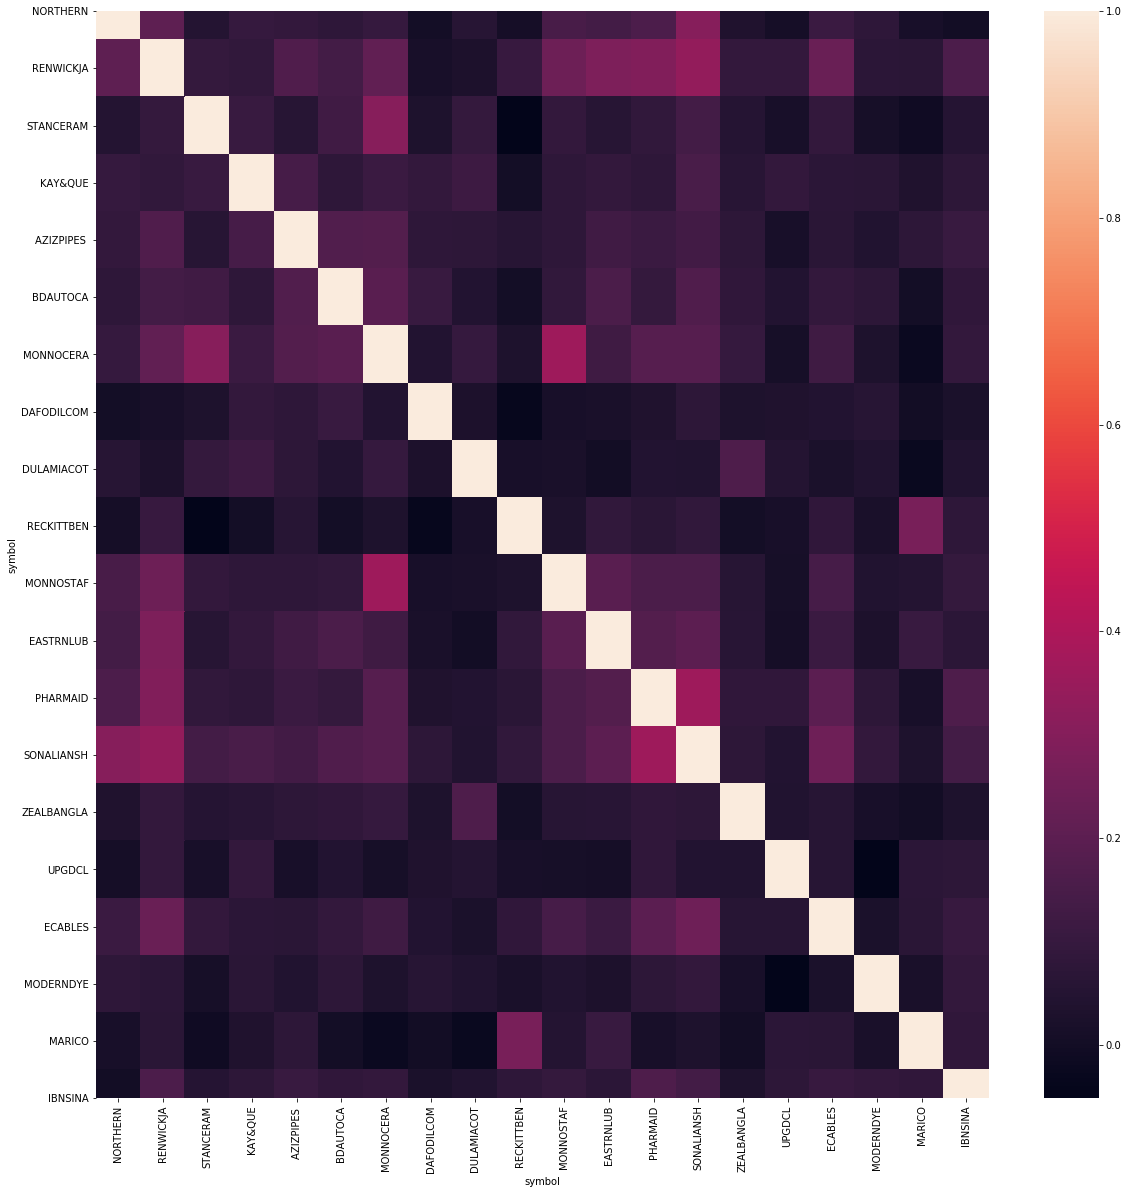

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(asset_risky.pct_change(1).corr())

In [55]:
asset_risky.pct_change(1).corr()

symbol,NORTHERN,RENWICKJA,STANCERAM,KAY&QUE,AZIZPIPES,BDAUTOCA,MONNOCERA,DAFODILCOM,DULAMIACOT,RECKITTBEN,MONNOSTAF,EASTRNLUB,PHARMAID,SONALIANSH,ZEALBANGLA,UPGDCL,ECABLES,MODERNDYE,MARICO,IBNSINA
symbol,,,,,,,,,,,,,,,,,,,,
NORTHERN,1.000000,0.206601,0.048930,0.097776,0.088822,0.079143,0.099728,0.002407,0.056472,0.008199,0.148711,0.133260,0.159847,0.305406,0.037578,0.009045,0.109325,0.076173,0.016590,0.000825
RENWICKJA,0.206601,1.000000,0.094715,0.086795,0.166276,0.136684,0.212952,0.016139,0.029219,0.104229,0.240381,0.284923,0.289694,0.338067,0.089199,0.091551,0.232678,0.068550,0.064683,0.160372
STANCERAM,0.048930,0.094715,1.000000,0.105562,0.058307,0.126916,0.307997,0.032822,0.093922,-0.051686,0.088505,0.058443,0.084100,0.133196,0.052344,0.014441,0.090337,0.013200,-0.008800,0.052562
KAY&QUE,0.097776,0.086795,0.105562,1.000000,0.143867,0.079315,0.112442,0.089297,0.117583,0.002080,0.079207,0.091233,0.078954,0.152250,0.063198,0.089427,0.069888,0.064329,0.036221,0.072614
AZIZPIPES,0.088822,0.166276,0.058307,0.143867,1.000000,0.172227,0.177269,0.076034,0.073864,0.055493,0.077566,0.125539,0.111714,0.129347,0.074536,0.015446,0.065493,0.039555,0.071824,0.108266
BDAUTOCA,0.079143,0.136684,0.126916,0.079315,0.172227,1.000000,0.190783,0.106928,0.044538,0.003120,0.084022,0.154577,0.093924,0.170036,0.082016,0.045914,0.091435,0.072290,0.003339,0.083642
MONNOCERA,0.099728,0.212952,0.307997,0.112442,0.177269,0.190783,1.000000,0.043547,0.099204,0.030742,0.359729,0.123261,0.183562,0.182819,0.099591,0.011615,0.121693,0.033960,-0.022263,0.089877
DAFODILCOM,0.002407,0.016139,0.032822,0.089297,0.076034,0.106928,0.043547,1.000000,0.029137,-0.034941,0.016145,0.020022,0.035114,0.075113,0.033638,0.037867,0.046743,0.057705,0.001162,0.025237
DULAMIACOT,0.056472,0.029219,0.093922,0.117583,0.073864,0.044538,0.099204,0.029137,1.000000,0.016162,0.020499,0.000876,0.046781,0.039487,0.163440,0.048536,0.023509,0.041656,-0.024712,0.040717


In [56]:
sharpe_ratio_all['MARICO']

0.3177039672418867

In [57]:
asset_risky.pct_change(1).cov()

symbol,NORTHERN,RENWICKJA,STANCERAM,KAY&QUE,AZIZPIPES,BDAUTOCA,MONNOCERA,DAFODILCOM,DULAMIACOT,RECKITTBEN,MONNOSTAF,EASTRNLUB,PHARMAID,SONALIANSH,ZEALBANGLA,UPGDCL,ECABLES,MODERNDYE,MARICO,IBNSINA
symbol,,,,,,,,,,,,,,,,,,,,
NORTHERN,1.194806e-03,0.000214,0.000054,0.000120,0.000098,0.000101,0.000117,2.066133e-06,0.000080,0.000006,0.000189,0.000134,0.000133,0.000315,0.000051,0.000007,0.000107,0.000106,1.037501e-05,6.005151e-07
RENWICKJA,2.144330e-04,0.000902,0.000091,0.000093,0.000154,0.000151,0.000217,1.203609e-05,0.000036,0.000067,0.000265,0.000248,0.000210,0.000303,0.000106,0.000061,0.000197,0.000083,3.513877e-05,1.014462e-04
STANCERAM,5.417444e-05,0.000091,0.001026,0.000120,0.000061,0.000150,0.000335,2.611097e-05,0.000123,-0.000035,0.000104,0.000054,0.000065,0.000127,0.000066,0.000011,0.000082,0.000017,-5.099761e-06,3.546817e-05
KAY&QUE,1.201655e-04,0.000093,0.000120,0.001264,0.000165,0.000104,0.000136,7.885344e-05,0.000171,0.000002,0.000103,0.000094,0.000068,0.000161,0.000089,0.000074,0.000070,0.000092,2.329914e-05,5.438928e-05
AZIZPIPES,9.758554e-05,0.000154,0.000061,0.000165,0.001034,0.000214,0.000205,5.994782e-05,0.000100,0.000035,0.000095,0.000118,0.000086,0.000124,0.000098,0.000012,0.000059,0.000053,3.678329e-05,7.399761e-05
BDAUTOCA,1.008635e-04,0.000151,0.000150,0.000104,0.000214,0.001359,0.000239,9.791531e-05,0.000067,0.000002,0.000114,0.000165,0.000084,0.000187,0.000120,0.000042,0.000095,0.000107,2.227562e-06,6.496742e-05
MONNOCERA,1.171803e-04,0.000217,0.000335,0.000136,0.000205,0.000239,0.001156,3.676450e-05,0.000138,0.000022,0.000448,0.000122,0.000151,0.000185,0.000134,0.000010,0.000117,0.000046,-1.369134e-05,6.436194e-05
DAFODILCOM,2.066133e-06,0.000012,0.000026,0.000079,0.000060,0.000098,0.000037,6.168331e-04,0.000030,-0.000019,0.000015,0.000014,0.000021,0.000056,0.000033,0.000022,0.000033,0.000058,5.221909e-07,1.320447e-05
DULAMIACOT,7.982059e-05,0.000036,0.000123,0.000171,0.000100,0.000067,0.000138,2.959150e-05,0.001672,0.000014,0.000031,0.000001,0.000046,0.000048,0.000264,0.000048,0.000027,0.000069,-1.828170e-05,3.507518e-05


In [58]:
sharpe_ratio_all.head(50)

symbol
NORTHERN              1.155803
RENWICKJA             0.989896
STANCERAM             0.908595
KAY&QUE               0.844263
AZIZPIPES             0.734045
BDAUTOCA              0.617676
MONNOCERA             0.591063
DAFODILCOM            0.499538
DULAMIACOT            0.463778
RECKITTBEN            0.454843
MONNOSTAF             0.449720
EASTRNLUB             0.437390
PHARMAID              0.427485
SONALIANSH            0.392770
ZEALBANGLA            0.358344
UPGDCL                0.354040
ECABLES               0.353783
MODERNDYE             0.317913
MARICO                0.317704
IBNSINA               0.273937
ANWARGALV             0.264529
DSHGARME              0.256271
LINDEBD               0.244935
SINOBANGLA            0.237359
SHYAMPSUG             0.234326
SAMATALETH            0.226063
LEGACYFOOT            0.215688
DBH                   0.205641
JMISMDL               0.204583
AMBEEPHA              0.189837
MTB                   0.188719
IMAMBUTTON            0.170129
R

In [59]:
annual_rss = pd.DataFrame({'Returns': annual_return_all, 'Standard Dev': annual_std_all, 'Sharpe Ratio': sharpe_ratio_all})

In [60]:
annual_rss.sort_values('Sharpe Ratio', ascending= False).head(50).to_clipboard()

In [61]:
(197/17)**(1/5)

1.6323130809104167

In [62]:
weights = pd.Series(np.arange(0,1.01,.01))
weights

0      0.00
1      0.01
2      0.02
3      0.03
4      0.04
       ... 
96     0.96
97     0.97
98     0.98
99     0.99
100    1.00
Length: 101, dtype: float64

In [63]:
assets_array = ['RENWICKJA','STANCERAM']
port_assets = annual_rss.loc[assets_array, :]
port_assets

,Returns,Standard Dev,Sharpe Ratio
RENWICKJA,0.561847,0.476663,0.989896
STANCERAM,0.552001,0.508479,0.908595


In [64]:
returns_assets = port_assets['Returns']
returns_assets

RENWICKJA    0.561847
STANCERAM    0.552001
Name: Returns, dtype: float64

In [65]:
cov = round(asset_risky[assets_array].pct_change(1).cov().loc[assets_array[0], assets_array[1]], 5)
cov

9e-05

In [66]:
port_df = pd.DataFrame(columns = ['Weights R', 'Weights S', 'Portfolio Return', 'Portfolio Std', 'Portfolio Sharpe Ratio' ])
returns_assets = port_assets['Returns']
std_assets = port_assets['Standard Dev']
cov = asset_risky[assets_array].pct_change(1).cov().loc[assets_array[0], assets_array[1]]
risk_free = .09
for each in weights:
    port_return = each*returns_assets[0]+(1 - each)*returns_assets[1]
    port_std = (each*std_assets[0])**2 + ((1-each)*std_assets[1])**2 + 2*each*(1-each)*cov 
    port_shrp = (port_return - risk_free ) / port_std
    port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
port_df.to_clipboard()
port_df

,Weights R,Weights S,Portfolio Return,Portfolio Std,Portfolio Sharpe Ratio
0,0.00,1.00,0.552001,0.258551,1.786888
1,0.01,0.99,0.552100,0.253430,1.823381
2,0.02,0.98,0.552198,0.248407,1.860651
3,0.03,0.97,0.552297,0.243480,1.898703
4,0.04,0.96,0.552395,0.238651,1.937537
...,...,...,...,...,...
96,0.96,0.04,0.561453,0.209816,2.246989
97,0.97,0.03,0.561552,0.214018,2.203328
98,0.98,0.02,0.561650,0.218318,2.160386
99,0.99,0.01,0.561749,0.222714,2.118180


In [67]:
port_df.sort_values('Portfolio Sharpe Ratio', ascending= False)

,Weights R,Weights S,Portfolio Return,Portfolio Std,Portfolio Sharpe Ratio
53,0.53,0.47,0.557220,0.120982,3.861894
54,0.54,0.46,0.557318,0.121008,3.861863
52,0.52,0.48,0.557121,0.121053,3.858827
55,0.55,0.45,0.557417,0.121132,3.858735
51,0.51,0.49,0.557023,0.121220,3.852675
...,...,...,...,...,...
4,0.04,0.96,0.552395,0.238651,1.937537
3,0.03,0.97,0.552297,0.243480,1.898703
2,0.02,0.98,0.552198,0.248407,1.860651
1,0.01,0.99,0.552100,0.253430,1.823381


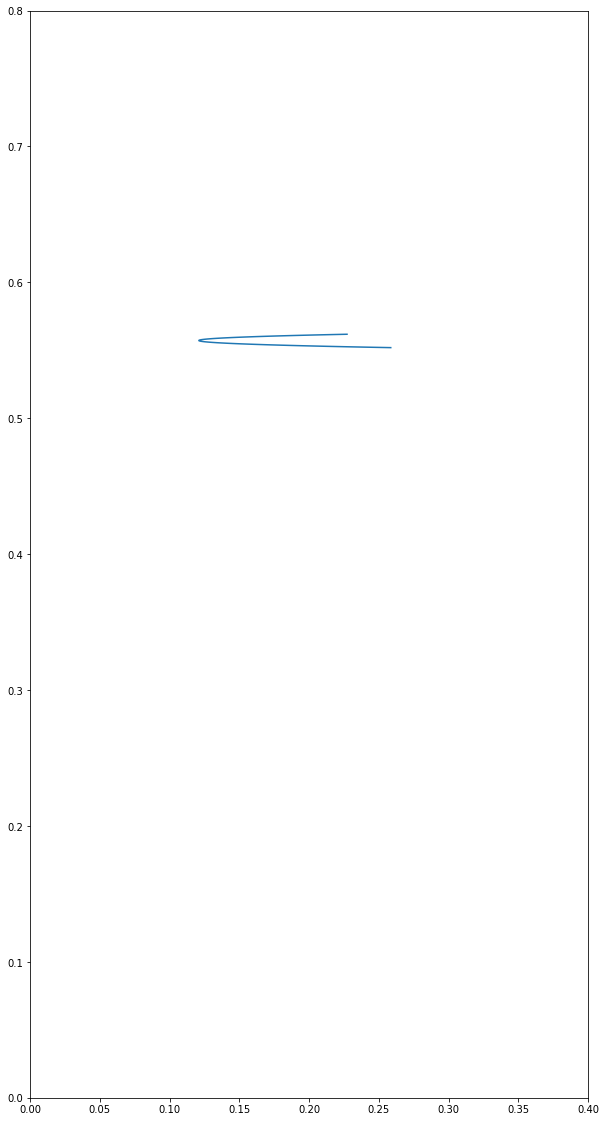

In [68]:
plt.figure(figsize=(20, 20))
plt.ylim(0, .8)
plt.xlim(0,0.4)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])